In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import scipy.stats
from scipy.stats import norm

I chose this topic because I am a runner. I haven't run in many years but recently got the itch to run again. I wanted to do something that I hadn't done before. The longest race I have ever done is 25 kilometers or about 16.6 miles. It seemed only natural to take on a marathon. I chose the San Francisco Marathon in July. I tracked my exercise numbers and we will look at historical data to find some trends.

The first dataset is a dataset that I created in February to track my daily exercise numbers. The two other datasets we will look at are from the Berlin marathon from 1974 to 2019. The first dataset has individual runner data and the second has yearly weather data from the race day.

V, David. (2019). Berlin marathon data. [data files] www.bmw-berlin-marathon.com https://www.kaggle.com/datasets/aiaiaidavid/berlin-marathons-data/

In [4]:
marathon = pd.read_csv("C:\\Users\\Brett\\Desktop\\ASU\\Classes\\Spring 2022\\DAT 301\\Project2\\Berlin_Marathon_data_1974_2019.csv", low_memory=False)
weather = pd.read_csv("C:\\Users\\Brett\\Desktop\\ASU\\Classes\\Spring 2022\\DAT 301\\Project2\\Berlin_Marathon_weather_data_since_1974.csv", low_memory=False)
mylog = pd.read_csv("C:\\Users\\Brett\\Desktop\\ASU\\Classes\\Spring 2022\\DAT 301\\Project2\\mylog.csv", low_memory=False)
marathon = marathon.loc[marathon["TIME"] != 'no time']

This is my exercise training data

In [5]:
display(mylog)

,DATE,RUN/Miles,WALK/Miles,BIKE/Miles,SWIM/Minutes,WEIGHT/Pounds
0,2022-2-11,2.0,0.0,0,0,208
1,2022-2-12,3.0,0.0,0,0,206
2,2022-2-13,3.0,0.0,0,0,206
3,2022-2-14,3.0,0.0,0,0,205
4,2022-2-15,2.0,0.0,0,0,205
...,...,...,...,...,...,...
74,2022-4-26,8.5,0.5,0,0,167
75,2022-4-27,7.0,0.5,0,0,166
76,2022-4-28,8.5,0.5,0,0,166
77,2022-4-29,11.0,0.5,0,0,167


Text(0, 0.5, 'POUNDS')

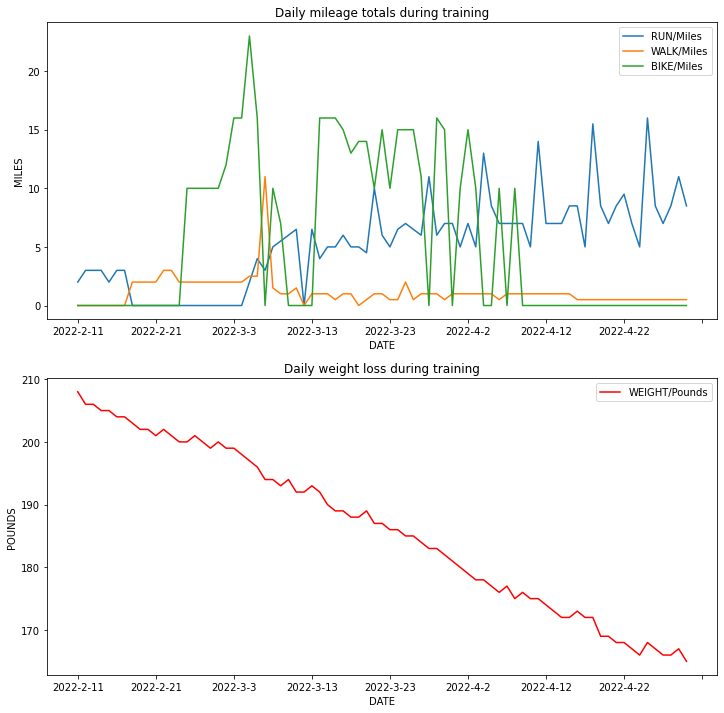

In [20]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (12,12))
mylog.plot(x = 'DATE', y = ['RUN/Miles', 'WALK/Miles', 'BIKE/Miles'], ax=ax1)
ax1.set_title("Daily mileage totals during training")
ax1.set_ylabel("MILES")
mylog.plot(x = 'DATE', y = ['WEIGHT/Pounds'], ax=ax2, color = 'red')
ax2.set_title("Daily weight loss during training")
ax2.set_ylabel("POUNDS")

At first, the training was bogged down by tendonitis. The big spike in biking miles was a reaction to this. I tried hiking in March that made me horribly tired. Luckily my running form came back and I was able to resume running. I was also able to resume biking. In April, the biking was getting boring and wasn't that useful for running anymore so I ditched it. Training for the marathon is going well now!

The dataset below is from the Berlin Marathon. It has been merged and cleaned. It also has the finishing times in convenient units for measurement.

In [16]:
def fun(time):
    return int(time[0:2]) * 3600 + int(time[3:5]) * 60 + int(time[6:8])

Time_in_seconds = marathon['TIME'].apply(fun)
marathon['Time_in_seconds'] = Time_in_seconds
marathon['Time_in_hours'] = Time_in_seconds / 3600
test = marathon.groupby('YEAR', as_index=False)['Time_in_hours'].mean()
test.rename(columns = {'Time_in_hours':'Avg_time_hours'}, inplace = True)
marathon_merged = pd.merge(marathon, test)
marathon_merged = pd.merge(marathon_merged, weather)
marathon_merged = marathon_merged.sort_values(by =['Time_in_hours'])
display(marathon_merged)

,YEAR,COUNTRY,GENDER,AGE,TIME,Time_in_seconds,Time_in_hours,Avg_time_hours,PRECIP_mm,SUNSHINE_hrs,CLOUD_hrs,ATMOS_PRESS_mbar,AVG_TEMP_C,MAX_TEMP_C,MIN_TEMP_C
811102,2018,NaN,male,30,02:01:39,7299,2.027500,4.316632,0.0,7.75,5.6,1013.82,14.9,22.4,9.0
851743,2019,ETH,male,35,02:01:41,7301,2.028056,4.044367,8.0,0.70,6.8,993.62,14.0,16.4,11.2
851744,2019,ETH,male,20,02:02:48,7368,2.046667,4.044367,8.0,0.70,6.8,993.62,14.0,16.4,11.2
670190,2014,NaN,male,30,02:02:57,7377,2.049167,4.130463,0.0,9.78,4.5,1016.39,12.7,21.2,5.1
735888,2016,NaN,male,30,02:03:03,7383,2.050833,4.210615,0.0,10.43,5.6,1012.05,14.5,23.0,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771878,2016,NaN,male,60,08:41:33,31293,8.692500,4.210615,0.0,10.43,5.6,1012.05,14.5,23.0,8.3
811101,2017,NaN,male,60,08:47:19,31639,8.788611,4.204538,0.3,1.50,7.5,1012.53,14.2,16.4,12.3
216924,1998,NaN,female,55,09:19:54,33594,9.331667,3.961136,0.0,9.90,1.0,1026.80,13.8,19.8,10.3
216925,1998,NaN,female,60,09:43:23,35003,9.723056,3.961136,0.0,9.90,1.0,1026.80,13.8,19.8,10.3


Text(0, 0.5, 'Frequency')

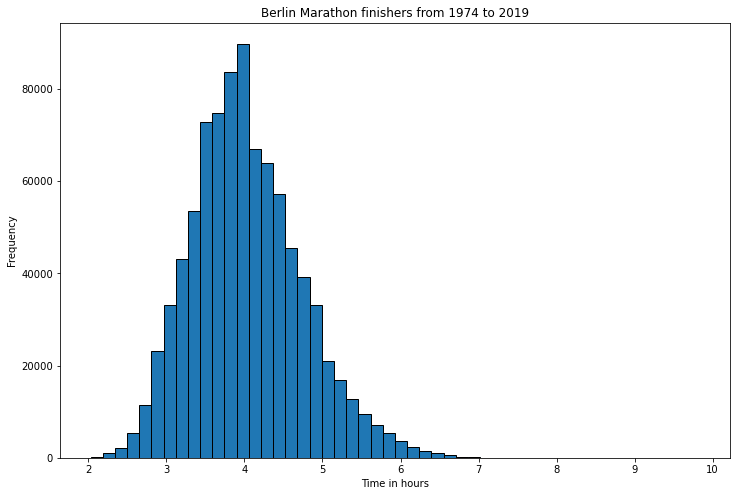

In [17]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
marathon_merged = marathon_merged.sort_values(by = ['YEAR'])
ax.hist(marathon_merged['Time_in_hours'], histtype='bar', bins = 50, edgecolor='black', linewidth=1)
ax.set_title("Berlin Marathon finishers from 1974 to 2019")
ax.set_xlabel("Time in hours")
ax.set_ylabel("Frequency")

The graph above shows all the finishers of the Berlin Marathon over the years. You can clearly see the mean finishing time is about 4 hours. My goal is to do better than that.

Text(0, 0.5, 'Frequency')

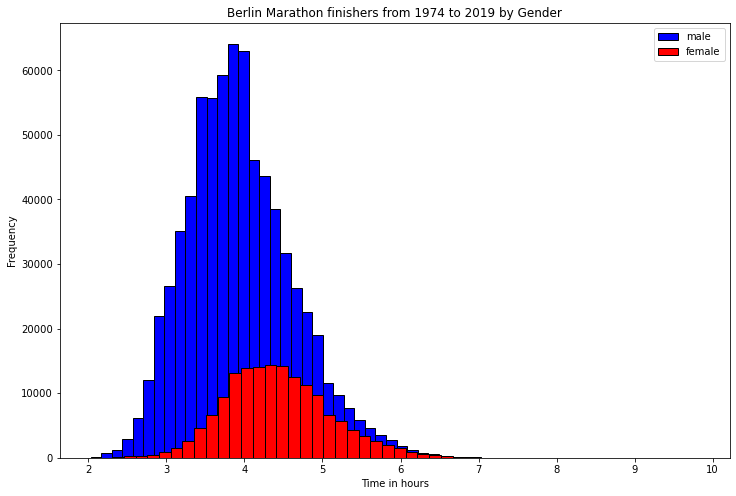

In [19]:
marathon_merged_male = marathon_merged[marathon_merged['GENDER'] == 'male']
marathon_merged_female = marathon_merged[marathon_merged['GENDER'] == 'female']
fig, ax = plt.subplots(1, 1, figsize = (12,8))
ax.hist(marathon_merged_male['Time_in_hours'], histtype='bar', bins = 50, edgecolor='black', linewidth=1, label='male', color ='blue')
ax.hist(marathon_merged_female['Time_in_hours'], histtype='bar', bins = 50, edgecolor='black', linewidth=1, label='female', color ='red')
ax.legend()
ax.set_title("Berlin Marathon finishers from 1974 to 2019 by Gender")
ax.set_xlabel("Time in hours")
ax.set_ylabel("Frequency")

There is a clear difference here in speed and in the number of competitors between men and women.

Text(0.5, 1.0, 'Avg precipitation and avg temperature for Berlin marathoners for each year')

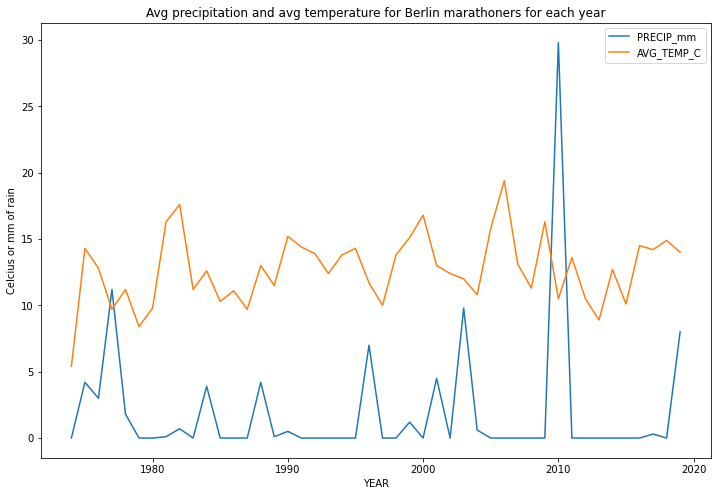

In [5]:
weather.plot(x = 'YEAR', y = ['PRECIP_mm', 'AVG_TEMP_C'], figsize=(12, 8), ylabel = "Celcius or mm of rain")
plt.title("Avg precipitation and avg temperature for Berlin marathoners for each year")

From this graph we can see the general numbers for precipitation and avg temperatures during each years marathon in Berlin.

Text(0.5, 1.0, 'Avg time in hours for Berlin marathoners for each year against the average temperature')

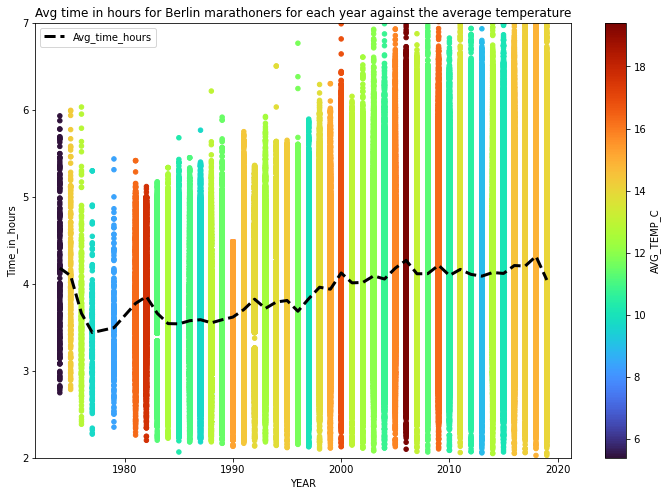

In [6]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
marathon_merged.plot.scatter(x= 'YEAR' , y='Time_in_hours', c='AVG_TEMP_C', ax=ax, colormap='turbo', ylim = [2,7])
marathon_merged.plot(x = 'YEAR', y = 'Avg_time_hours', ax=ax, color = 'black', linewidth = 3, linestyle='dashed')
plt.title("Avg time in hours for Berlin marathoners for each year against the average temperature")

From this graph we can make some interesting conclusions. First, we can see a strong correlation between the temperature and the average finishing time (the dashed line in black). As the temperature increases we see an increase in the finishing time. We also see a large increase in finishing time when the temperature is extremely cold. Mild decreases in temperature seem to yield better marathon finishing time results.

Text(0.5, 1.0, 'Avg time in hours for Berlin marathoners for each year against the average precipitation')

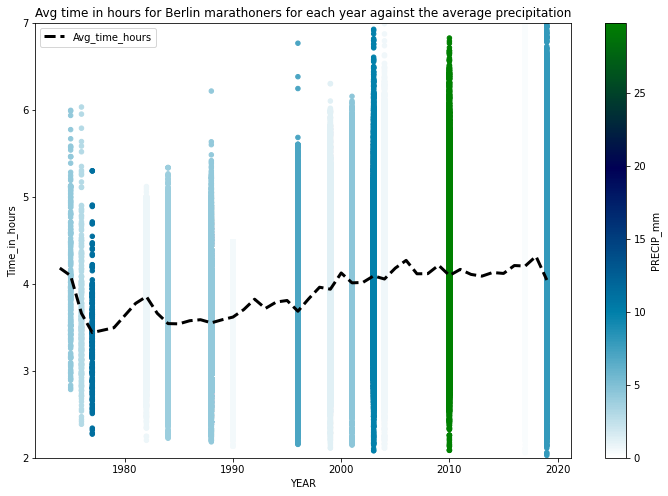

In [21]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
marathon_merged.plot.scatter(x= 'YEAR' , y='Time_in_hours', c='PRECIP_mm', ax=ax, colormap='ocean_r', ylim = [2,7])
marathon_merged.plot(x = 'YEAR', y = 'Avg_time_hours', ax=ax, color = 'black', linewidth = 3, linestyle='dashed')
plt.title("Avg time in hours for Berlin marathoners for each year against the average precipitation")

Maybe unexpectedly, precipitation seems to have an even stronger correlation with the finishing times. When it rains, the average finishing times decrease the most. Even in years where the average temperature is warm, the average finishing time lowers when there is a large amount of precipitation. This might be caused by the water acting as a cooling agent, allowing the body to cool itself without having to sweat, which saves energy and allows the runners to run faster.

In conclusion, running a marathon is a challenge. Most runners take about 4 hours to complete one. Men run a bit faster. Also, cooler course temperature and sufficient rainfall have about a 15 to 30 minute effect on average finishing times. San Francisco will be very cool as the average morning temperature in July is about 55 degrees fahrenheit. This is almost exactly the same as Berlin's average race temperature. However, San Francisco is a much hillier course and I will have to take that into account.